In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from numpy.linalg import inv

DATASET READING


In [ ]:
df = pd.read_csv("insurance.txt",sep = ",")
df.insert(0,'0th_feature',1)

# New Section

DATA VISUALIZATION


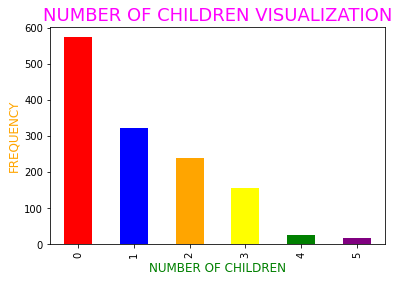

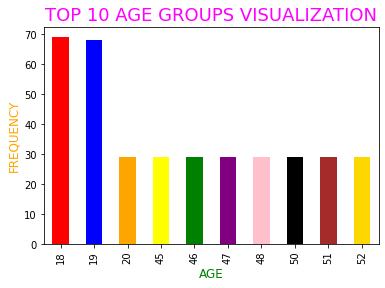

In [ ]:
colormap = ['red','blue','orange','yellow','green','purple','pink','black','brown','gold']
plot1 = plt.figure(1)
df['children'].value_counts().sort_index().plot.bar(color = colormap)
plt.title('NUMBER OF CHILDREN VISUALIZATION',fontsize = 18,color = 'magenta')
plt.xlabel('NUMBER OF CHILDREN',color = 'green',fontsize = 12)
plt.ylabel('FREQUENCY',color = 'orange',fontsize = 12)
plot2 = plt.figure(2)
df['age'].value_counts()[:10].sort_index().plot.bar(color = colormap)
plt.title('TOP 10 AGE GROUPS VISUALIZATION',fontsize = 18,color = 'magenta')
plt.xlabel('AGE',color = 'green',fontsize = 12)
plt.ylabel('FREQUENCY',color = 'orange',fontsize = 12)
plt.show()

PREPROCESSING

In [ ]:
def standardize(x,u,sigma):
  return (x-u)/sigma

In [ ]:
def preprocessing(df):
  mean_age = df.mean()['age']
  age_variance =df.std()['age']
  mean_bmi = df.mean()['bmi']
  bmi_variance = df.std()['bmi']
  mean_children = df.mean()['children']
  children_variance = df.std()['children']
  mean_charges = df.mean()['charges']
  charges_variance = df.std()['charges']  
  df['age'] = df['age'].apply(lambda x : standardize(x,mean_age,age_variance)) 
  df['bmi'] = df['bmi'].apply(lambda x : standardize(x,mean_bmi,bmi_variance)) 
  df['children'] = df['children'].apply(lambda x : standardize(x,mean_children,children_variance)) 
  df['charges']  = df['charges'].apply(lambda x : standardize(x,mean_charges,charges_variance)) 
  return df    


FUNCTIONS

In [ ]:
def error_value(w,X,y):
  return (np.sum((np.dot(X,w) - y)**2))/2

In [ ]:
def train(X_train,y_train):
  n = len(X_train)
  a = np.dot(np.transpose(X_train),y_train)
  b = np.dot(np.transpose(X_train),X_train)
  return inv(X_train.transpose().dot(X_train)).dot(X_train.transpose()).dot(y_train)


In [ ]:
def predict(parameters,X_test):
  return np.dot(X_test,parameters)

In [ ]:
def RMSE(y_true,y_pred):
  return np.sqrt(((y_true - y_pred) ** 2).mean())

TRAINING AND TESTING PHASES

In [ ]:
train_errors = []
train_sum_of_squares = []
test_sum_of_squares = []
errors = []
weights_list = []
for k in range(20):
  # TRAINING PHASE
  df = df.sample(frac=1, random_state=k*100)
  df = df.reset_index(drop = True)
  df = preprocessing(df)
  train_size = int(0.7*len(df))
  X_train = np.array(df.drop(['charges'], axis = 1)[:train_size])
  X_test = np.array(df.drop(['charges'], axis = 1)[train_size:])
  y_train = np.array(df['charges'][:train_size])
  y_test = np.array(df['charges'][train_size:])
  weights = train(X_train,y_train)
  weights_list.append(weights)

  y_train_pred = predict(weights,X_train)
  train_error = RMSE(y_train,y_train_pred)
  train_errors.append(train_error)

  train_sum_of_square_error = error_value(weights,X_train,y_train)
  train_sum_of_squares.append(train_sum_of_square_error)
  
  # TESTING PHASE 
  y_pred = predict(weights,X_test)

  test_sum_of_square_error = error_value(weights,X_test,y_test)
  test_sum_of_squares.append(test_sum_of_square_error)

  error = RMSE(y_test,y_pred)
  errors.append(error)

TESTING PHASE


MODEL EVALUATION


In [ ]:
errors = np.array(errors)
print("For the training set, mean sum of square of errors = {} and variance square of errors = {}".format(np.mean(train_sum_of_squares),np.var(train_sum_of_squares)))
print("For the test set, mean sum of square of errors = {} and variance square of errors = {}".format(np.mean(test_sum_of_squares),np.var(test_sum_of_squares)))
print("For the training set, mean RMSE = {} and variance RMSE = {}".format(np.mean(train_errors),np.var(train_errors)))
print("For the test set, mean RMSE = {} and  variance RMSE = {}".format(np.mean(errors),np.var(errors)))

For the training set, mean sum of square of errors = 412.8898074847315 and variance square of errors = 143.8310853643415
For the test set, mean sum of square of errors = 176.21891324394159 and variance square of errors = 144.96206737808077
For the training set, mean RMSE = 0.9391778182726199 and variance RMSE = 0.0001882040508600869
For the test set, mean RMSE = 0.9357961111353363 and  variance RMSE = 0.0009966495478696414


WEIGHT MATRICES OF THE 20 MODELS


In [ ]:
for index,i in enumerate(weights_list):
  print("Weights of model {} are :".format(index+1),i)

Weights of model 1 are : [-0.01548248  0.28772759  0.16782284  0.05467951]
Weights of model 2 are : [-0.01306509  0.27361388  0.16038129  0.0620708 ]
Weights of model 3 are : [0.01279312 0.27788533 0.19452665 0.04083376]
Weights of model 4 are : [-0.04401701  0.29865985  0.13852504  0.06654701]
Weights of model 5 are : [-0.01273746  0.30957553  0.15000451  0.04864896]
Weights of model 6 are : [0.01090912 0.26928012 0.17997873 0.06423713]
Weights of model 7 are : [0.03017399 0.290573   0.20672774 0.06659119]
Weights of model 8 are : [0.01614965 0.28910865 0.18915273 0.02545868]
Weights of model 9 are : [-0.01168249  0.2856858   0.16295787  0.03640721]
Weights of model 10 are : [0.00221134 0.26059678 0.17243315 0.03274891]
Weights of model 11 are : [0.0029046  0.28269505 0.18077328 0.05350132]
Weights of model 12 are : [0.03095922 0.29496258 0.19909846 0.06845833]
Weights of model 13 are : [0.00628893 0.25650654 0.15415032 0.02032251]
Weights of model 14 are : [-0.00989496  0.28864309  0